Advanced Programming in Python – MiniProject #1 - Ofek Klein

#GIT URL
https://github.com/ofek-k/biu_py_c_2.git

# Part 1 – Object Oriented programming

A. Hierarchy diagram

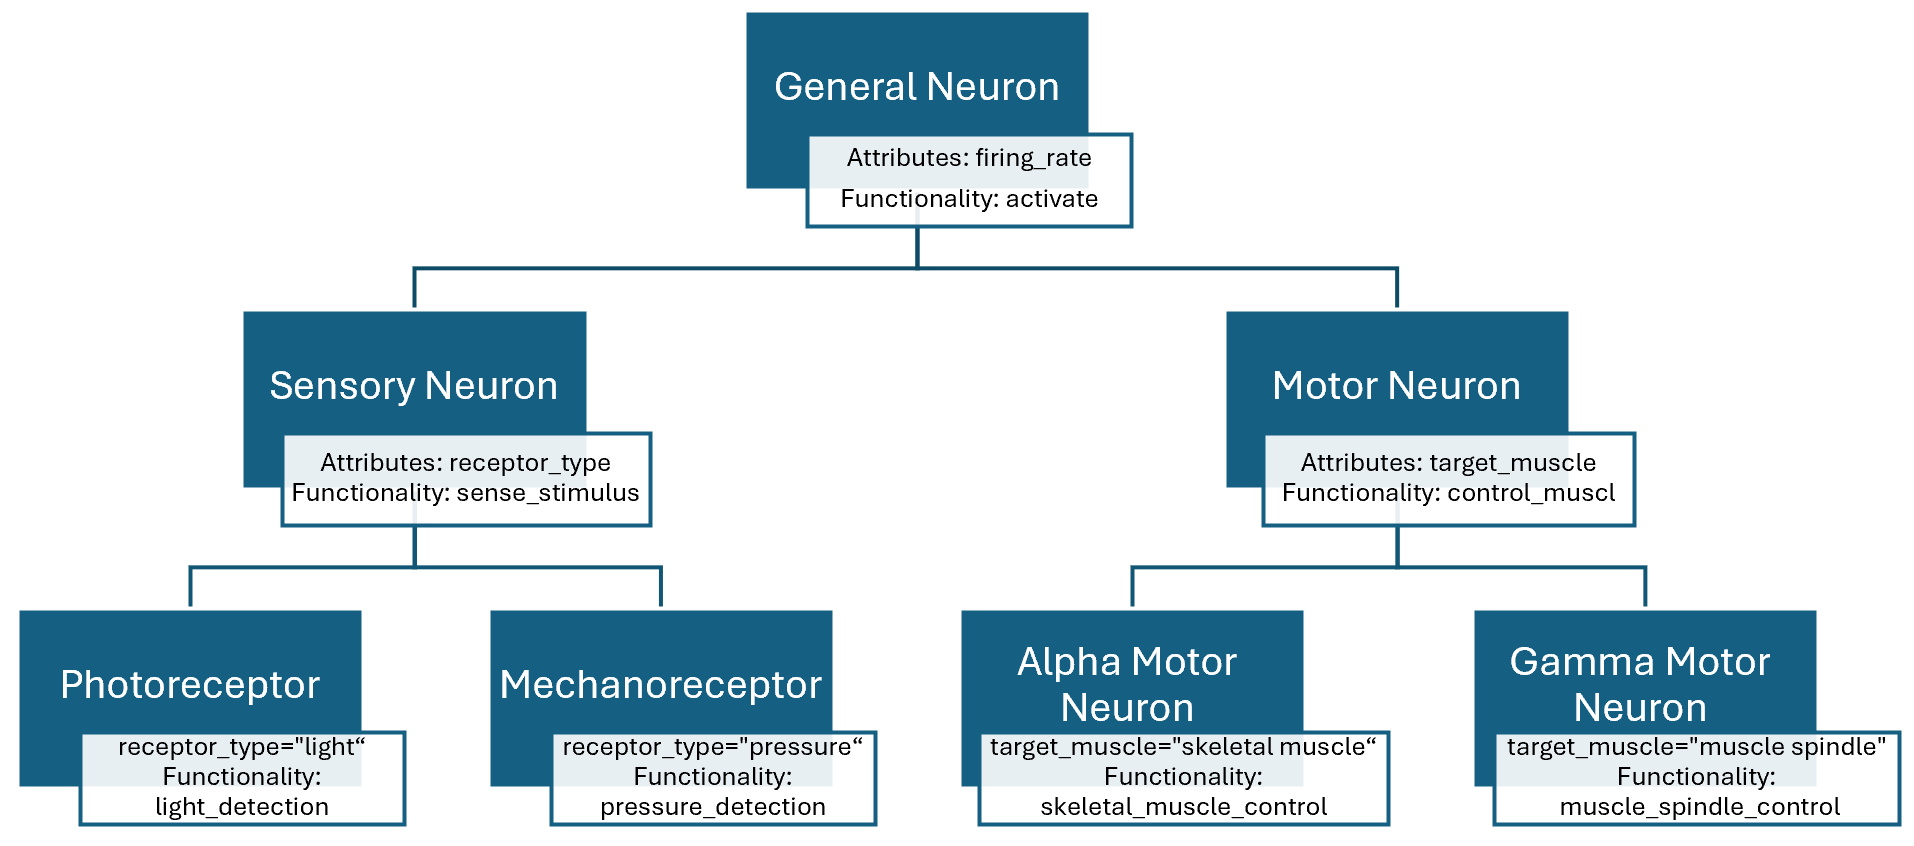

B. Defining classes

In [ ]:
class General_Neuron:
    def __init__(self,firing_rate):
        self.firing_rate=firing_rate
    def activate(self,stimulus_strength):
        pass

class Sensory_Neuron (General_Neuron):
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate)
        self.receptor_type=receptor_type
    def sense_stimulus(self,stimulus_strength,stimulus_type):
        if stimulus_type==self.receptor_type:
            self.activate(stimulus_strength)
        
class Motor_Neuron (General_Neuron):
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate)
        self.target_muscle=target_muscle
    def control_muscle(self,activation_level):
        pass

class Photoreceptor (Sensory_Neuron):
    def __init__(self,firing_rate):
        super().__init__(firing_rate,"light")
    def light_detection(self,light_intensity):
        self.sense_stimulus(light_intensity,"light")
        self.firing_rate=self.firing_rate*(1+light_intensity/100)

class Mechanoreceptor (Sensory_Neuron):
    def __init__(self,firing_rate):
        super().__init__(firing_rate,"pressure")
    def pressure_detection(self,pressure_strength):
        self.sense_stimulus(pressure_strength,"pressure")
        self.firing_rate=self.firing_rate*(1+pressure_strength/100)


class Alpha_Motor_Neuron (Motor_Neuron):
    def __init__(self,firing_rate):
        super().__init__(firing_rate,"skeletal muscle")
    def control_muscle(self):
        pass

class Gamma_Motor_Neuron (Motor_Neuron):
    def __init__(self,firing_rate):
        super().__init__(firing_rate,"muscle spindle")
    def control_muscle(self):
        pass

# Part 2 – NumPy, Pandas, MatPlotLib:

Q1 - 1+2. Implementing downsampled_signal function using numpy

In [266]:
import numpy as np

def downsampled_signal(x_vals,signal,step=5):
    '''Input: two NumPy arrays representing a sinusoidal signal (y) and its x values. an integer 'step' representing the step size for downsampling (default is 5)
    Output: two new numpy arrays (x,y) representing the same signal (~20% of the original lenght, with all min and max values)'''

    #creating min and max y indexes array
    get_indexes = lambda val, data: [i for (data_val, i) in zip(data, range(len(data))) if val == data_val]

    max_indexes = get_indexes(max(signal),signal)
    min_indexes = get_indexes(min(signal),signal)
    min_max_indexes=sorted(max_indexes+min_indexes)#appending and sorting min&max values
    min_max_arr=np.array(min_max_indexes)#converting list to np.array

    #creating `step` indexes array - leaving fifth of the data
    steps_indexes=np.arange(0, len(signal), step)

    #combined and unique desired indexes
    combined_indexes = sorted(np.unique(np.concatenate([steps_indexes, min_max_arr])))

    #downsample the signal
    downsample_signal=signal[combined_indexes]
    downsample_signal_x=x_vals[combined_indexes]

    return downsample_signal_x, downsample_signal

Q1 - 3. A short script to verify the functionality of downsampled_signal function implementation:

Original Signal Length: 100
Downsampled Signal Length: 20


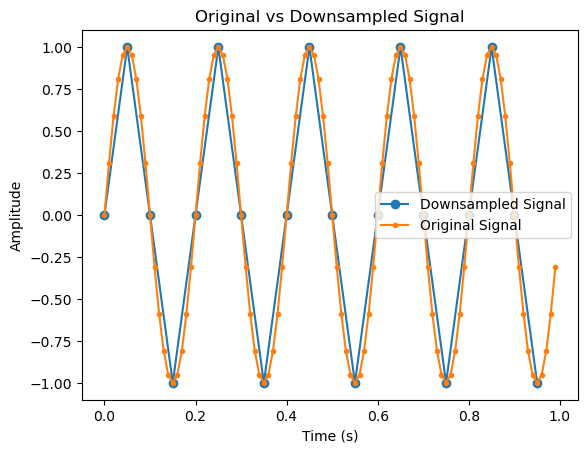

In [267]:
import matplotlib.pyplot as plt
#generate a 5Hz sinusoidal signal sampled every 0.01 seconds
x = np.arange(0, 1, 0.01)
signal = np.sin(2 * np.pi * 5 * x)

#downsample the signal
downsample_signal_x,downsample_signal = downsampled_signal(x,signal)

#print the original and downsampled signal lengths
print("Original Signal Length:", len(signal))
print("Downsampled Signal Length:", len(downsample_signal))

#plot of the original and downsampled signal
plt.plot(downsample_signal_x,downsample_signal,marker='o',label="Downsampled Signal")
plt.plot(x,signal,marker='.',label="Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original vs Downsampled Signal")
plt.legend()
plt.show()

Q2 - laptop-price dataset

In [ ]:
#import matplotlib.pyplot as plt
import pandas as pd
#import numpy as np - imported in Q1

df=pd.read_csv("laptop_price - dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

* Plot of the price of all laptops

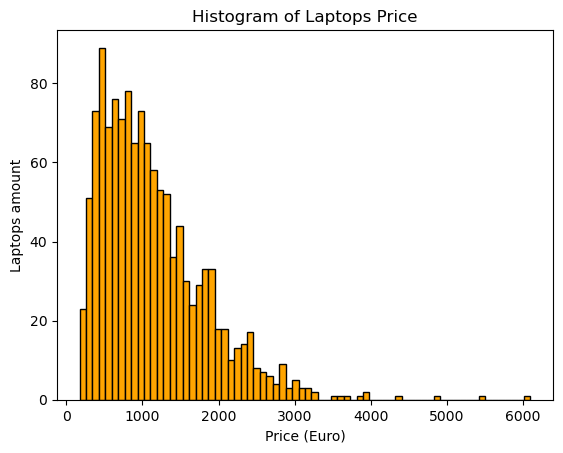

In [90]:
plt.hist(df["Price (Euro)"], bins=70, edgecolor='black',color='orange')
plt.title('Histogram of Laptops Price')
plt.xlabel('Price (Euro)')
plt.ylabel('Laptops amount')
plt.show()

* Prices analysis per company

In [80]:
#calculate the average price for each company
company_mean_prices=df.groupby("Company")["Price (Euro)"].mean()

#find the company with the highest average price
expensive_company=company_mean_prices.idxmax()
max_mean_price=company_mean_prices.max()

print("The company which has the most expensive laptops on average is", expensive_company,"with mean price of",max_mean_price,"euros")
print("The average laptop price for each company:")
print(company_mean_prices)

The company which has the most expensive laptops on average is Razer with mean price of 3346.1428571428573 euros
The average laptop price for each company:
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64


* Operating systems analysis

In [81]:
print(df["OpSys"].unique())#display unique operating system values

#defining uniform operating system names
os_mapping = {
    'Windows 10': 'Windows',
    'Windows 7': 'Windows',
    'Windows 10 S': 'Windows',
    'Mac OS X': 'MacOS',
    'macOS': 'MacOS',
    'No OS': 'No OS',
    'Linux': 'Linux',
    'Chrome OS': 'ChromeOS',
    'Android': 'Android'
}

#apply the mapping on the column
df['OpSys'] = df['OpSys'].map(os_mapping)#no na_action because there are no null values in the column

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [82]:
os_types=df["OpSys"].unique()
print("The different types of Operating systems present in the data are:",os_types)

The different types of Operating systems present in the data are: ['MacOS' 'No OS' 'Windows' 'Linux' 'Android' 'ChromeOS']


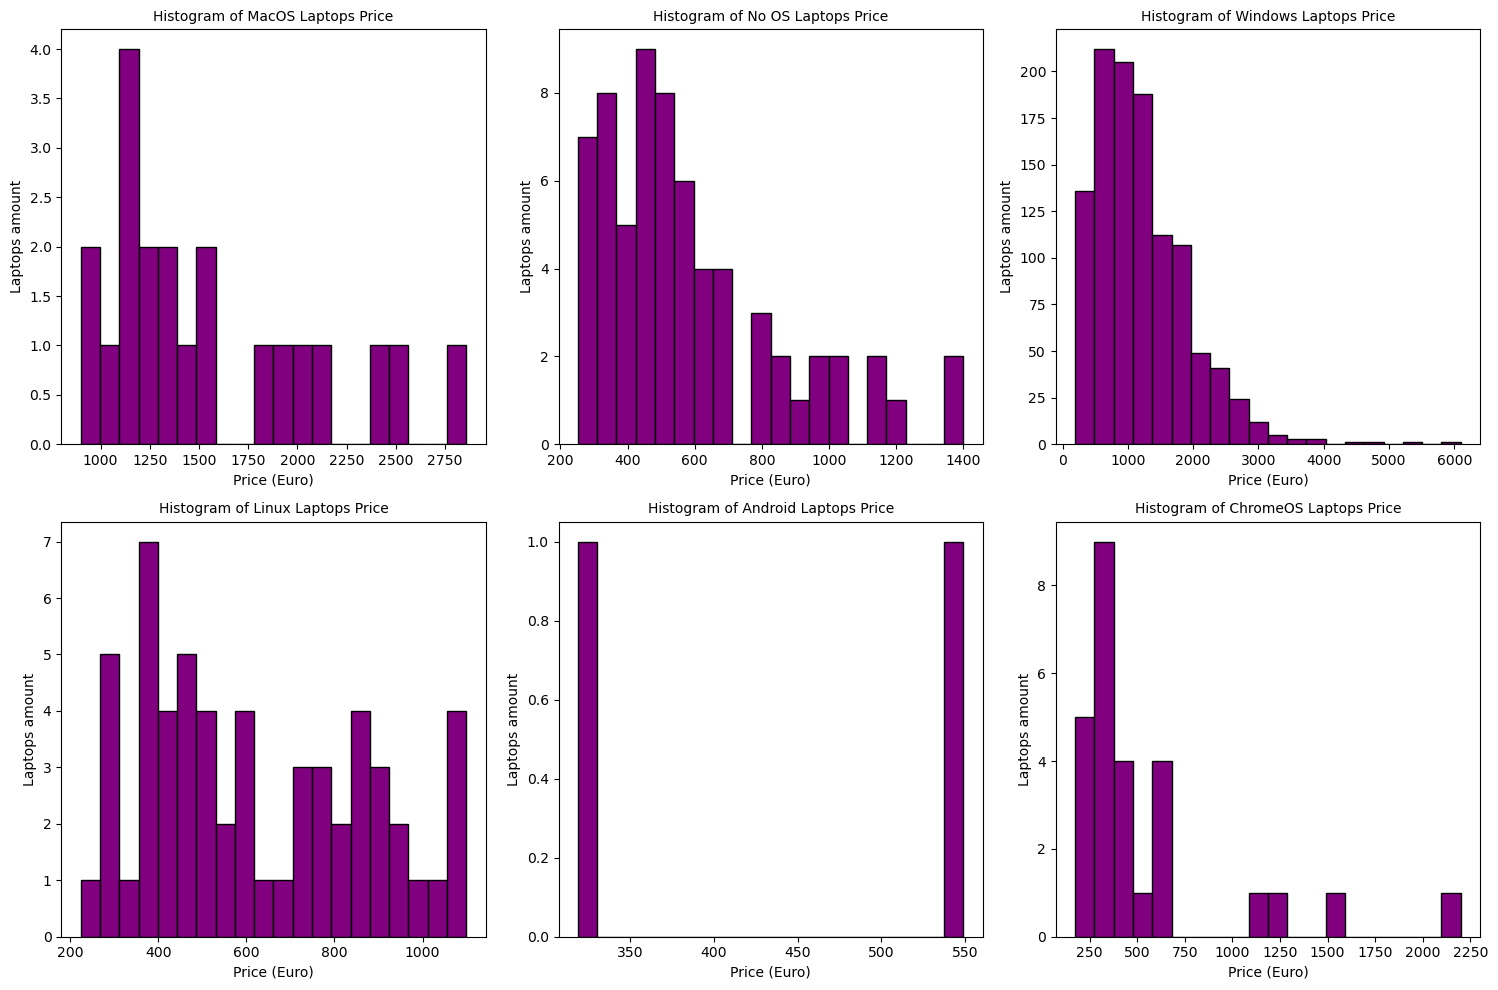

In [99]:
#plot prices for each OS

# Create a single figure for all subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each operating system and create a subplot
for i, os in enumerate(os_types):
    os_price_data = df.loc[df["OpSys"] == os, "Price (Euro)"]
    axes[i].hist(os_price_data, bins=20, edgecolor='black', color='purple')
    axes[i].set_title(f"Histogram of {os} Laptops Price", fontsize=10)
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Laptops amount')

# Adjust layout
plt.tight_layout()
plt.show()

* Relationship between RAM and computer price

In [33]:
#scatter x and y data -
x_ram=df["RAM (GB)"]
y_price=df["Price (Euro)"]

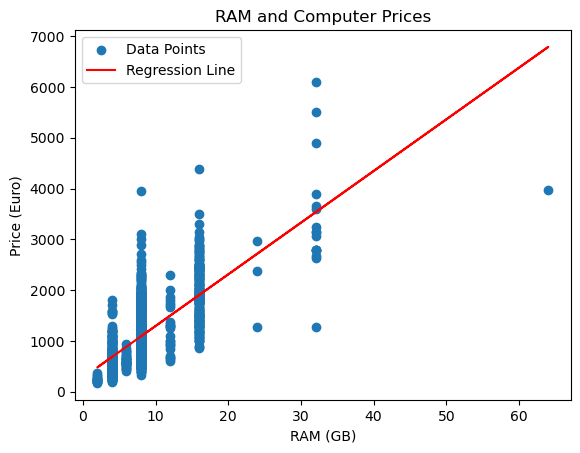

There is a direct relationship between the RAM variable and the price,
 so as the RAM increases, so does the price (although for most RAMs there is a relatively wide price range).


In [102]:
#Fit a regression line
coefficients = np.polyfit(x_ram, y_price, 1)#linear regression (degree=1)
regression_line = np.poly1d(coefficients)#generate the polynomial object

#Generate predicted y-values for the regression line
y_fit = regression_line(x_ram)


plt.scatter(x_ram, y_price, label='Data Points')#plot the scatter plot
plt.plot(x_ram, y_fit, color='red', label='Regression Line')#plot the regression line

#Add titles and labels
plt.title('RAM and Computer Prices')
plt.ylabel('Price (Euro)')
plt.xlabel('RAM (GB)')
plt.legend()
plt.show()
print("There is a direct relationship between the RAM variable and the price,\n so as the RAM increases, so does the price (although for most RAMs there is a relatively wide price range).")

* "Storage type" new column

In [ ]:
def strg_type_from_memory(string_val):
    ''''input - a string of a memory value in a row. output - a string representing the storage type'''
    if "+" in string_val:#two storage types
        first=string_val.split(" + ")[0].split("B ")[1]
        last=string_val.split(" + ")[1].split("B ")[1]
        if first==last:
            return first
        else:
            return first+", "+last
    else:#not contains "+", only one value
        return string_val.split("B ")[1]

In [73]:
df["Storage type"] = df["Memory"].apply(strg_type_from_memory)
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00,SSD
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00,SSD
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00,HDD


In [74]:
df["Storage type"].value_counts()

SSD                   635
HDD                   359
SSD, HDD              200
Flash Storage          70
Hybrid                  8
SSD, Hybrid             2
Flash Storage, HDD      1
Name: Storage type, dtype: int64

* Bonus question

Additional questions related to this data:

In [188]:
print("1. Which company is more expansive regarding it's protuct qualities rather than brands (is there price difference for the same\n values of non-companies variables - Inches, ScreenResolution, CPU_Type, CPU_Frequency, RAM, Memory, GPU_Type, Weight)?")
print("2. Which laptop type is the most expensive?.")
print("3. Which variable has the most influance on the price?")
print("4. Which CPU or GPU company is more widespread, by the prevalence of each company in the data.")
print("5. Are smaller laptops more expansive (Inches,Weight) or vice versa?")

1. Which company is more expansive regarding it's protuct qualities rather than brands (is there price difference for the same
 values of non-companies variables - Inches, ScreenResolution, CPU_Type, CPU_Frequency, RAM, Memory, GPU_Type, Weight)?
2. Which laptop type is the most expensive?.
3. Which variable has the most influance on the price?
4. Which CPU or GPU company is more widespread, by the prevalence of each company in the data.
5. Are smaller laptops more expansive (Inches,Weight) or vice versa?


Suggested analyses and visualization:

In [210]:
print("1. leave distinct values of the above coloumns, the remaining rows are groups of computers which share the same qualities.\n for each computer (unique-row-values) calculate the diffrence between the prices. sum the diffrences of each computer for every company.\n plot a gragh showing the cumulative prices difference of every company.")
print("2. calculate the evarage price of each unique value in the 'TypeName' column.\n then plot a graph of the calculated values for each leptop type.")
print("3. remove each column in a time, and leave identical rows (accept values in the price column).\ncalculate the maxium diffrence between prices. after applying on every column, check which\n column absence showed the maximun price difference.")
print("4. plot histogram for the unique values of the 'CPU_Type' or 'GPU_Type' columns.")
print("5. plot two scatter plots to check the relationship between Inches or Weight and price.")

1. leave distinct values of the above coloumns, the remaining rows are groups of computers which share the same qualities.
 for each computer (unique-row-values) calculate the diffrence between the prices. sum the diffrences of each computer for every company.
 plot a gragh showing the cumulative prices difference of every company.
2. calculate the evarage price of each unique value in the 'TypeName' column.
 then plot a graph of the calculated values for each leptop type.
3. remove each column in a time, and leave identical rows (accept values in the price column).
calculate the maxium diffrence between prices. after applying on every column, check which
 column absence showed the maximun price difference.
4. plot histogram for the unique values of the 'CPU_Type' or 'GPU_Type' columns.
5. plot two scatter plots to check the relationship between Inches or Weight and price.


Implementation - #2 and #5:

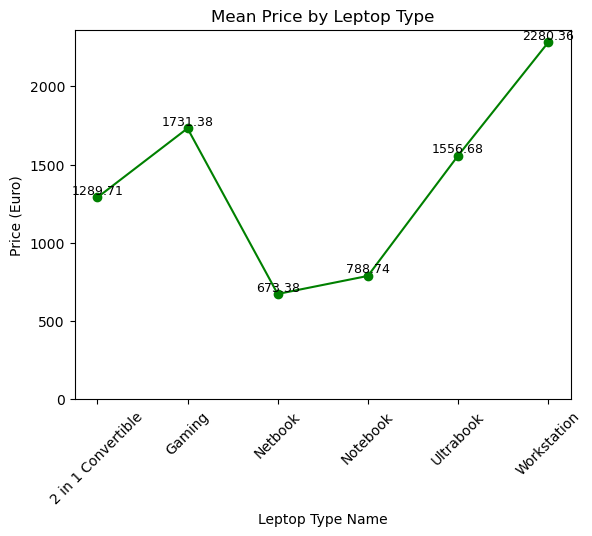

In [272]:
#2 - Which laptop type is the most expensive?

#calculate the average price for each TypeName
typeName_mean_prices=df.groupby("TypeName")["Price (Euro)"].mean()

#plot the graph
plt.plot(company_mean_prices, color="green", marker='o')

#add y-values to the plot, formats the price to two decimal places.
for i, value in enumerate(typeName_mean_prices):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

#set Y-axis to start at 0
plt.ylim(0, None)  #the second parameter (None) allows Matplotlib to calculate the upper limit automatically.

#titles and labels
plt.title('Mean Price by Leptop Type')
plt.ylabel('Price (Euro)')
plt.xlabel('Leptop Type Name')

#add x-axis tick labels for laptop types
plt.xticks(ticks=range(len(typeName_mean_prices)), labels=typeName_mean_prices.index, rotation=45)

plt.show()

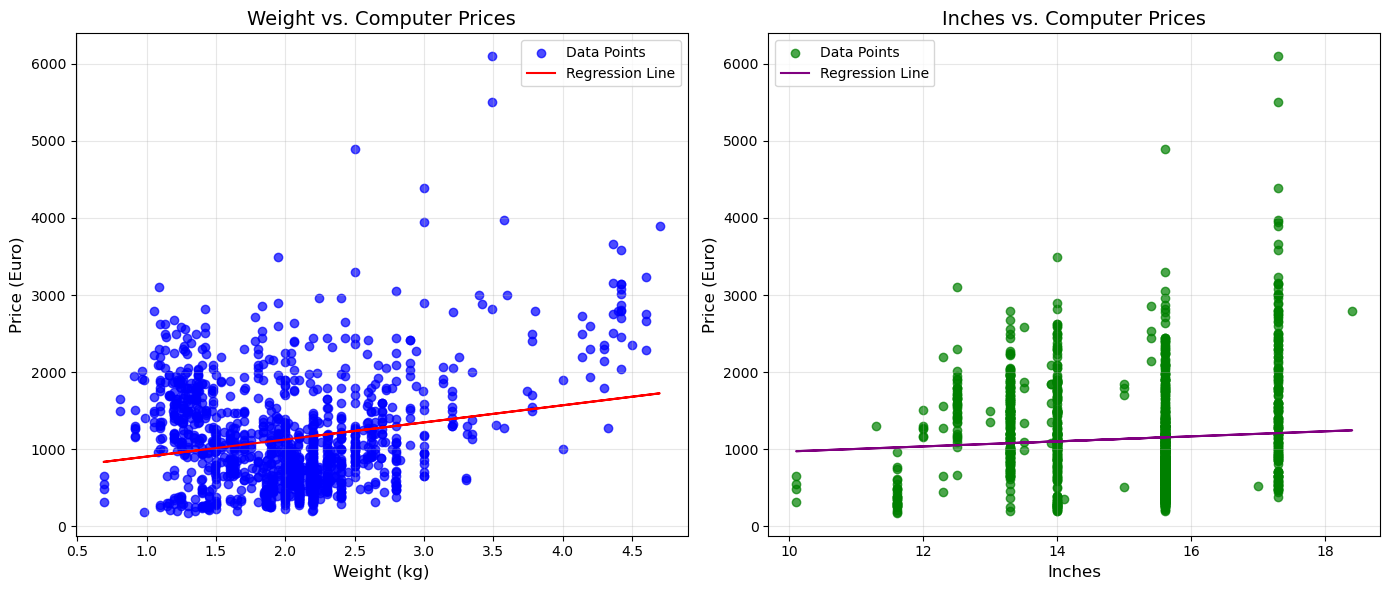

In [196]:
#5 - Are smaller laptops more expansive (Inches,Weight)?
#scatter 1: Weight vs. Price
x_weight = df["Weight (kg)"]
y_price_weight = df["Price (Euro)"]

#fit a regression line for weight
coefficients_weight = np.polyfit(x_weight, y_price_weight, 1)  # Linear regression (degree=1)
regression_line_weight = np.poly1d(coefficients_weight)  # Generate the polynomial object
y_fit_weight = regression_line_weight(x_weight)  # Predicted y-values

#scatter 2: Inches vs. Price
x_inch = df["Inches"]
y_price_inch = df["Price (Euro)"]

#fit a regression line for inches
coefficients_inch = np.polyfit(x_inch, y_price_inch, 1)  # Linear regression (degree=1)
regression_line_inch = np.poly1d(coefficients_inch)  # Generate the polynomial object
y_fit_inch = regression_line_inch(x_inch)  # Predicted y-values

#create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#plot for Weight vs. Price
axes[0].scatter(x_weight, y_price_weight, label='Data Points', color='blue', alpha=0.7)
axes[0].plot(x_weight, y_fit_weight, color='red', label='Regression Line')
axes[0].set_title('Weight vs. Computer Prices', fontsize=14)
axes[0].set_xlabel('Weight (kg)', fontsize=12)
axes[0].set_ylabel('Price (Euro)', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

#plot for Inches vs. Price
axes[1].scatter(x_inch, y_price_inch, label='Data Points', color='green', alpha=0.7)
axes[1].plot(x_inch, y_fit_inch, color='purple', label='Regression Line')
axes[1].set_title('Inches vs. Computer Prices', fontsize=14)
axes[1].set_xlabel('Inches', fontsize=12)
axes[1].set_ylabel('Price (Euro)', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

#adjust layout
plt.tight_layout()
plt.show()


Additional questions related to this data:

In [197]:
print("There is no relation between Inches to Price. There is very moderate direct relation between Weight and Price")

There is no relation between Inches to Price. There is very moderate direct relation between Weight and Price
